



        Задание: в data/payments.csv находится история покупок, совершённых с устройств Apple за некоторый период времени.
        Проверьте гипотезу:
        1) что пользователи iPhone платит лучше iPad;
        2) iPhone X самый платящий девайс.
        Визуализация приветствуется.



        




        Предобработка данных



        
      Event Revenue USD           Device Type           Device_Type  \
0                   259              iPhone 8              iphone 8   
1                  1045         iPhone 7 Plus         iphone 7 plus   
2                   928         iPhone 7 Plus         iphone 7 plus   
3                   582         iPhone 7 Plus         iphone 7 plus   
4                   499  iPad Pro (10.5 inch)  ipad pro (10.5 inch)   
...                 ...                   ...                   ...   
5617                658         iPhone 8 Plus         iphone 8 plus   
5618                878         iPhone 7 Plus         iphone 7 plus   
5619        

  0%|          | 0/1000 [00:00<?, ?it/s]

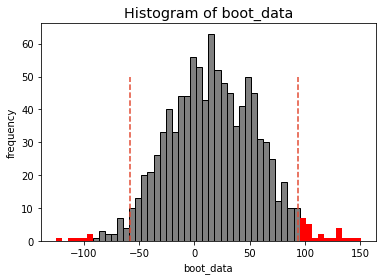

{'boot_data': [-0.5026288117770767, 150.26288117770767, -48.92613038906414, 45.61251314405889, -27.025762355415353, 48.317297581493165, 66.04390115667718, -26.48895899053628, 16.66982124079916, -16.523133543638277, 32.653522607781284, -34.90615141955836, 82.66850683491062, -21.451366982124078, -36.64248159831756, 47.40825446898002, 10.612513144058886, -9.721083070452156, 21.18533123028391, -26.869610935856993, -23.210567823343847, 17.225552050473187, -9.289169295478445, -29.663249211356465, 9.40036803364879, 31.4726603575184, 67.29705573080967, 79.69794952681389, -32.57360672975815, 55.63932702418507, 0.5680862250262881, 32.829652996845425, 17.576761303890642, -8.160094637223974, 1.7016298633017877, -17.246056782334385, -8.344111461619349, 62.9108832807571, 67.29731861198738, -5.811251314405888, -25.94453207150368, 63.3835436382755, 38.662197686645634, -7.577287066246057, -1.1203995793901156, 58.58096740273396, 14.764195583596214, 36.89511041009464, 37.35856992639327, -2.38722397476340

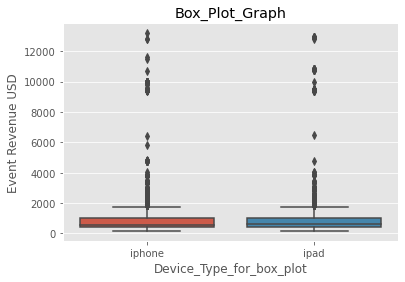

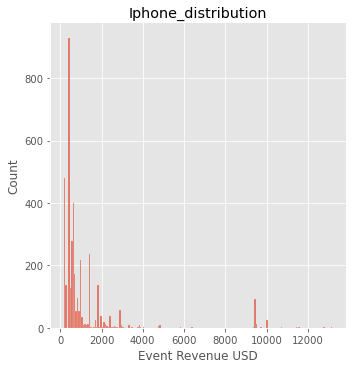

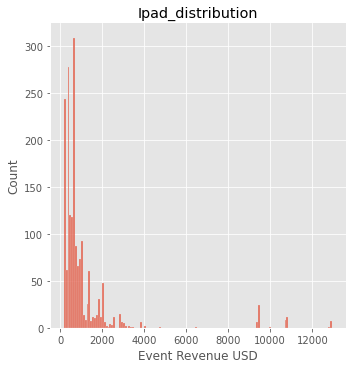

None




        Начало второго задания



        



        Словарь с кодировкой: {0: 'ipad 5', 1: 'ipad 7,5', 2: 'ipad air 2', 3: 'ipad mini 4', 4: 'ipad pro (10.5 inch)', 5: 'ipad pro (12.9 inch)', 6: 'ipad pro (9.7 inch)', 7: 'iphone 11,6', 8: 'iphone 6', 9: 'iphone 6s', 10: 'iphone 6s plus', 11: 'iphone 7', 12: 'iphone 7 plus', 13: 'iphone 8', 14: 'iphone 8 plus', 15: 'iphone se', 16: 'iphone x'}


        
MannwhitneyuResult(statistic=151604.5, pvalue=0.09207666713831292)


  0%|          | 0/1000 [00:00<?, ?it/s]

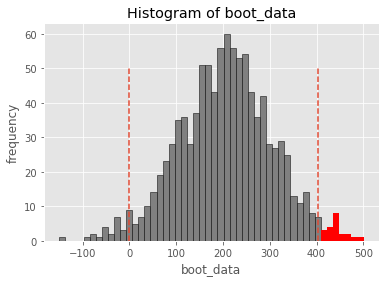

{'boot_data': [-84.1738746690203, 282.1473962930274, 228.24183583406884, 307.0494263018535, 189.13415710503088, 335.2797881729921, 385.28067078552516, 201.0035304501324, 194.50838481906442, 147.87908208296557, 362.0944395410415, 226.24624889673433, 151.57016769638128, 248.1332744924978, 264.5172109443954, 232.3901147396293, 267.43689320388347, 414.6107678729038, 184.28155339805826, 164.15798764342455, 107.76345984112974, 174.963812886143, 137.33451015004414, 241.21182700794353, 170.20388349514562, 197.02383053839364, 170.27714033539277, 190.9532215357458, 224.8314210061783, 211.1685789938217, 284.79876434245364, 298.9170344218888, 395.64165931156225, 331.5207413945278, 208.93909973521625, 306.55428067078554, 160.89496910856136, 325.70432480141216, 139.6972639011474, 335.71226831421006, 167.47396293027361, 195.42806707855252, 143.66107678729037, 227.11120917917034, 239.6857899382171, 288.9293909973522, 233.828773168579, 261.1235657546337, 281.42012356575464, 144.40953221535744, 185.7784

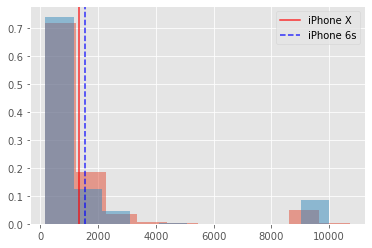

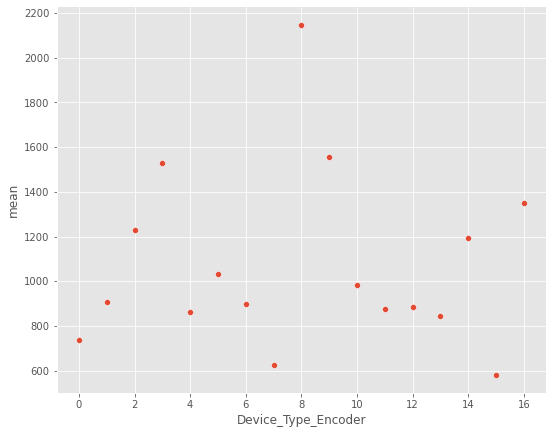

None


In [1]:

import pandas as pd

pd.plotting.register_matplotlib_converters()
from scipy import stats
from scipy.stats import mannwhitneyu
import statsmodels.api as sm
import matplotlib.pyplot as plt
import warnings
from itertools import product
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
import numpy as np
from io import StringIO
from tqdm.auto import tqdm
from scipy.stats import norm


class Export_data:
    file_path = 'C:/Users/Dell/Projects/ds_interview/data/payments.csv'


    data = pd.read_csv(file_path, sep=r'[\t]', engine='python')

    def __init__(self, data):
        self.data = data
    # file_path = 'C:/Users/Dell/Projects/ds_interview/data/payments.csv'
    # data = pd.read_csv(file_path, sep=r'[\t]', engine='python')


class Preproccesing(Export_data):

    def __init__(self, data, get_bootstrap=None, man_coef=None, two_histograms = None, create_tuple = None,
                 preproc=None):  # add in "init" another def in class 'Preproccessing'
        self.data = data
        self._preproc = preproc
        self._get_bootstrap = get_bootstrap
        self._man_coef = man_coef
        self._two_histograms = two_histograms
        self._create_tuple = create_tuple

    def get_bootstrap(
            data_column_1,  # числовые значения первой выборки
            data_column_2,  # числовые значения второй выборки
            boot_it=1000,  # количество бутстрэп-подвыборок
            statistic=np.mean,  # интересующая нас статистика
            bootstrap_conf_level=0.95  # уровень значимости
    ):
        boot_len = max([len(data_column_1), len(data_column_2)])
        boot_data = []
        for i in tqdm(range(boot_it)):  # извлекаем подвыборки
            samples_1 = data_column_1.sample(
                boot_len,
                replace=True  # параметр возвращения
            ).values

            samples_2 = data_column_2.sample(
                boot_len,  # чтобы сохранить дисперсию, берем такой же размер выборки
                replace=True
            ).values

            boot_data.append(statistic(samples_1 - samples_2))
        pd_boot_data = pd.DataFrame(boot_data)

        left_quant = (1 - bootstrap_conf_level) / 2
        right_quant = 1 - (1 - bootstrap_conf_level) / 2
        quants = pd_boot_data.quantile([left_quant, right_quant])

        p_1 = norm.cdf(
            x=0,
            loc=np.mean(boot_data),
            scale=np.std(boot_data)
        )
        p_2 = norm.cdf(
            x=0,
            loc=-np.mean(boot_data),
            scale=np.std(boot_data)
        )
        p_value = min(p_1, p_2) * 2

        # Визуализация
        _, _, bars = plt.hist(pd_boot_data[0], bins=50)
        for bar in bars:
            if abs(bar.get_x()) <= quants.iloc[0][0] or abs(bar.get_x()) >= quants.iloc[1][0]:
                bar.set_facecolor('red')
            else:
                bar.set_facecolor('grey')
                bar.set_edgecolor('black')

        plt.style.use('ggplot')
        plt.vlines(quants, ymin=0, ymax=50, linestyle='--')
        plt.xlabel('boot_data')
        plt.ylabel('frequency')
        plt.title("Histogram of boot_data")
        plt.show()

        return {"boot_data": boot_data,
                "quants": quants,
                "p_value": p_value}

    def man_coef(a, b):

        return mannwhitneyu(a, b)

    def two_histograms(x, y, x_name, y_name):

        """
        Функция, которая построит две гистограммы на одной картинке.
        Дополнительно пунктирными линиями указываются средние значения выборок.
        x: вектор pd.Series,
        y: вектор pd.Series
        """
        x.hist(alpha=0.5, weights=[1. / len(x)] * len(x))
        y.hist(alpha=0.5, weights=[1. / len(y)] * len(y))
        plt.axvline(x.mean(), color='red', alpha=0.8, linestyle='solid')
        plt.axvline(y.mean(), color='blue', alpha=0.8, linestyle='dashed')
        plt.legend([x_name, y_name])

    def create_tuple(a, b):
        return dict(zip(a, b))

    def preproc(self, data):

        print("""



        Задание: в data/payments.csv находится история покупок, совершённых с устройств Apple за некоторый период времени.
        Проверьте гипотезу:
        1) что пользователи iPhone платит лучше iPad;
        2) iPhone X самый платящий девайс.
        Визуализация приветствуется.



        """)

        print("""



        Предобработка данных



        """)
        # создаем новые столбцы для дальнейшей визуализации
        data['Device_Type'] = data['Device Type'].str.lower()
        data['Device_Type'].replace('iphone11,6', 'iphone 11,6', inplace=True)
        data['Device_Type'].replace('ipad7,5', 'ipad 7,5', inplace=True)
        data['Device_Type_for_box_plot'] = data['Device_Type'].replace('iphone11,6', 'iphone 11,6', inplace=True)
        data['Device_Type_for_box_plot'] = data['Device_Type'].replace('ipad7,5', 'ipad 7,5', inplace=True)
        data['Device_Type_for_box_plot'] = data['Device_Type'].apply(lambda x: x.rsplit(maxsplit=len(x.split()) - 1)[0])
        data['Event_Revenue_USD_log'] = np.log10(data['Event Revenue USD'])

        label = LabelEncoder()
        dicts = {}
        label.fit(data['Device_Type'].drop_duplicates())  # задаем список значений для кодирования
        dicts['Device_Type_Encoder'] = list(label.classes_)
        data['Device_Type_Encoder'] = label.transform(
            data['Device_Type'])  # заменяем значения из списка кодами закодированных элементов

        data['Event_Revenue_USD_box_cox'], lmbda = stats.boxcox(data['Event Revenue USD'])

        return data


class Task_1(Export_data):  # add "Preproccessing"

    def __init__(self, data, vis_for_task_1=None, stat_coef_for_hyp_testing=None):
        self.data = data
        self._vis_for_task_1 = vis_for_task_1
        self._stat_coef_for_hyp_testing = stat_coef_for_hyp_testing

    def stat_coef_for_hyp_testing(self, data):
        #
        print("""



        Начало первого задания



        """)
        # mannwhitneyu
        print(Preproccesing.man_coef(
            data[data.Device_Type_for_box_plot == 'iphone']['Event Revenue USD'],
            data[data.Device_Type_for_box_plot == 'ipad']['Event Revenue USD']
        ))

        # bootstrap
        #
        print(Preproccesing.get_bootstrap(
            data[data.Device_Type_for_box_plot == 'iphone']['Event Revenue USD'],  # числовые значения первой выборки
            data[data.Device_Type_for_box_plot == 'ipad']['Event Revenue USD'],  # числовые значения второй выборки
            boot_it=1000,  # количество бутстрэп-подвыборок
            statistic=np.mean,  # интересующая нас статистика
            bootstrap_conf_level=0.95  # уровень значимости
        ))

    def vis_for_task_1(self, data):
        # box_plot_graph
        sns.boxplot(x='Device_Type_for_box_plot', y='Event Revenue USD', data=data).set_title('Box_Plot_Graph')
        #
        # iphone_distribution
        sns.displot(data[data['Device_Type_for_box_plot'] == 'iphone']['Event Revenue USD'], kde=False).ax.set_title(
            'Iphone_distribution')
        #
        # ipad_distribution
        sns.displot(data[data['Device_Type_for_box_plot'] == 'ipad']['Event Revenue USD'], kde=False).ax.set_title(
            'Ipad_distribution')
        #
        print(""" Вывод по первому заданию (неоднозначный): при применении критерия Манна-Уитни результаты статистически значимы
              и мы вправе отвергнуть нулевую гипотезу о случайности разниц средних, однако при
              применении метода Bootstrap p-value получается слишком большим (0,70) по сравнению
              с пороговым значением альфа = 0.05. Поэтому различия средних между двумя выборками
              статистически незначимы и разница средних двух выборок случайна
              (сделал окончательный вывод после применения bootstrap)

              Визуализация по первому заданию представлена снизу""")
        #
        #
        return plt.show()
        #
        #


class Task_2(Export_data):

    def __init__(self, data, vis_for_task_2=None, stat_coef_for_hyp_testing_2=None):
        self.data = data
        self._vis_for_task_2 = vis_for_task_2
        self._stat_coef_for_hyp_testing_2 = stat_coef_for_hyp_testing_2

    def stat_coef_for_hyp_testing_2(self, data):
        #
        print("""



        Начало второго задания



        """)
        #
        #
        print("""


        Словарь с кодировкой: {}


        """.format(Preproccesing.create_tuple(np.arange(len(set(data['Device_Type']))), \
                                              sorted(set(list(data["Device_Type"]))))))
        #
        # mannwhitneyu
        print(Preproccesing.man_coef(
            data[data['Device_Type_Encoder'] == 16]['Event Revenue USD'],
            data[data['Device_Type_Encoder'] == 9]['Event Revenue USD']
        ))

        # bootstrap
        #
        print(Preproccesing.get_bootstrap(
            data[data.Device_Type_Encoder == 9]['Event Revenue USD'],  # числовые значения первой выборки
            data[data.Device_Type_Encoder == 16]['Event Revenue USD'],  # числовые значения второй выборки
            boot_it=1000,  # количество бутстрэп-подвыборок
            statistic=np.mean,  # интересующая нас статистика
            bootstrap_conf_level=0.95  # уровень значимости
        ))

    def vis_for_task_2(self, data):
        #
        print("""


        Словарь с кодировкой: {}


        """.format(Preproccesing.create_tuple(np.arange(len(set(data['Device_Type']))), \
                                              sorted(set(list(data["Device_Type"]))))))
        # two_histograms
        Preproccesing.two_histograms(data[data['Device_Type_Encoder'] == 16]['Event Revenue USD'], \
                                     data[data['Device_Type_Encoder'] == 9]['Event Revenue USD'], \
                                     'iPhone X', 'iPhone 6s')
        #
        # sns_mean_relplot
        grouped_1 = data.groupby('Device_Type_Encoder').agg({'Event Revenue USD': [np.sum, np.mean, np.std]})
        sns.relplot(x="Device_Type_Encoder", y=grouped_1['Event Revenue USD']['mean'],
                    data=grouped_1).fig.set_size_inches(8, 6)



        print("""По второму заданию: коэффициент Манна-Уитни, больше порогового значения альфа.
        Значит нулевая гипотеза, говорящая о случайной разницы количества оплаты с iphone x
        и iphone 6s, не может быть отвергнута.

        Вывод бустрепу: разница в среднем чеке iphone 6s и iphone x не случайна:
        95% доверительный интервал разницы средних iphone 6s и iphone x не включает 0

        Окончательный вывод: так как один из критериев не дает точного ответа,
        мы не можем отвергнуть гипотезу о случайности разниц средних

        Вывод по графикам снизу: самый платящий девайс - это не iphone x. По графику видно,
        что средний чек iphone 6 - самый большой,
        но доказать это с помощью критериев Манна Уитни и Методом bootstrap мы не можем,
        потому что в выборке всего лишь одно наблюдение""")

        return plt.show()


def _main():
    #
    #
    preproc = Preproccesing(Export_data.data)
    preproccesing = Preproccesing(Export_data.data, preproc)
    prepoccesed = preproccesing.preproc(Export_data.data)
    print(prepoccesed)
    #
    #
    stat_coef_for_hyp_testing = Task_1(Preproccesing.data)
    making_coef_for_task_1 = Task_1(Preproccesing.data, stat_coef_for_hyp_testing)
    made_coef_for_task_1 = making_coef_for_task_1.stat_coef_for_hyp_testing(Preproccesing.data)
    print(made_coef_for_task_1)
    #
    #
    vis_for_task_1 = Task_1(Preproccesing.data)
    visualisation_for_task_1 = Task_1(Preproccesing.data, vis_for_task_1)
    print(visualisation_for_task_1.vis_for_task_1(Preproccesing.data))

    stat_coef_for_hyp_testing_2 = Task_2(Preproccesing.data)
    making_coef_for_task_2 = Task_2(Preproccesing.data, stat_coef_for_hyp_testing_2)
    made_coef_for_task_2 = making_coef_for_task_2.stat_coef_for_hyp_testing_2(Preproccesing.data)
    print(made_coef_for_task_2)

    vis_for_task_2 = Task_2(Preproccesing.data)
    visualisation_for_task_2 = Task_2(Preproccesing.data, vis_for_task_2)
    print(visualisation_for_task_2.vis_for_task_2(Preproccesing.data))


# Будем исполнять нашу программу только тогда, когда она вызывается напрямую,
# а не, например, через импортирование как модуль:
if __name__ == '__main__':
    _main()

